# Individual Assignment 2: Evaluating Linear Models (Happiness Data)

-----------------------
**Dr. Dave Wanik - OPIM 5512: Data Science Using Python**

Let's put all of your skills to work on a basic regression modeling notebook! **Note:** DO NOT just copy and paste Dave's code: you need to type this all yourself with your own comments, print statements, and checking your work. If you just copy/paste, you won't learn - and I know what my code style looks like 😉 let's see your style!

[Download the 2022 World Happiness Report data here](https://docs.google.com/spreadsheets/d/1IfRlUwQDS800md3tiMPyhUr9RMawQZah/edit?usp=sharing&ouid=115523639675710586183&rtpof=true&sd=true), drag onto your Google Drive, mount your Drive, then read the dataframe as `df`. Then...

Read more here:
* https://worldhappiness.report/ed/2022/
* https://worldhappiness.report/ed/2022/#appendices-and-data

10 pts each.
* Q1) Select rows where Year is equal to 2021 (edited 9/18/2022 - thanks Javier!) only. Name it `df`. Use this subset for the rest of the assignment.
* Q2) View and count how many rows have missing values, then drop any rows with missing values. What do these rows have in common (if anything)?
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such.
* Q4) Count how many unique values are in the `Country` column.
* Q5) Which countries are happiest? Which are the saddest? Top 10 highest and lowest happinness (df['Life Ladder']).
* Q6) Make a new dataframe called `X` that subsets the `Log GDP per capita` through and including `Confidence in national government`.
* Q7) Subset `df['LifeLadder`] from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition. Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.
* Ql0) This one is more involved but it's really important. Only worth ten points so give it a shot. This would make a great exam or technical interview question - we can discuss during the hybrid class! Write your own ten-fold cross-validation on X_train with a for loop (just like we did in class.) Apply the model each of the ten times to the X_test partition (once for each fold). Store your results efficiently in the for loop! Calculate mean absolute error for each fold and application of the model to X_test. Make a scatterplot of actual vs. predicted values for each fold and for each application of the model to X_test with nice axis labels, titles and markers. Were your results consistent among all of the folds and on X_test? Did your model quality decrease or remain fairly consistent? 

Please use nice subheaders/titles so that your code is easy to grade. For example Q1 should be in the subtitle for Q1.



# Ready to explore dataset



Read the data from google drive and import library and packages to modeling 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_excel('/content/drive/MyDrive/OPIM 5512 DS using Python Colab/DataForTable2.1.xls')

Before we find solutions of above questions, explore the overall information of happiness dataset: columns, shape, types

In [5]:
print("The shape of happiness data is",df.shape,'\n') # Started from dataset with 2089 rows and 12 columns
print("We can find columns of happiness dataset as below: \n",'\n',df.columns,"\n")
print("These are the data types: \n","\n",df.dtypes)

The shape of happiness data is (2089, 12) 

We can find columns of happiness dataset as below: 
 
 Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object') 

These are the data types: 
 
 Country name                          object
year                                   int64
Life Ladder                          float64
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
dtype:

In [6]:
df.head(n=10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,2017,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179


# Q1) Subset the row
- Select rows where Year is equal to 2021
- Name it df. Use this subset for the rest of the assignment.

In [7]:
df=df[df['year']==2021]  # Dataset with year=21 has 119 rows and 12 columns
print(df.shape)
df

(119, 12)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
12,Afghanistan,2021,2.436034,NaN,0.454175,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
36,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Uzbekistan,2021,6.185308,8.941695,0.895504,65.300003,0.927415,0.188775,0.661562,0.698459,0.232672,0.912673
2029,Venezuela,2021,5.107553,NaN,0.812418,64.050003,0.595620,NaN,0.823898,0.697587,0.389351,0.175912
2045,Vietnam,2021,5.540250,9.028702,0.799494,65.500000,0.896800,0.126362,0.797788,0.650598,0.280437,NaN
2072,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678


# Q2) View and count missing values
- View and count how many rows have missing values
- Drop any rows with missing values. 
- What do these rows have in common (if anything)?


In [8]:
tmp=df[df.isna().any(axis=1)]
print(tmp.shape)
tmp

# I can find 19 rows with missing values.

(19, 12)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
12,Afghanistan,2021,2.436034,NaN,0.454175,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620
36,Algeria,2021,5.217018,9.303516,0.840710,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN
293,Cambodia,2021,4.555141,8.348701,0.712758,61.900002,0.965093,0.019179,0.844353,0.759147,0.391310,NaN
376,China,2021,5.862864,9.776109,0.856007,68.750000,0.874756,0.023953,NaN,0.697810,0.239618,NaN
463,Cyprus,2021,6.269202,NaN,0.855357,72.800003,0.717639,NaN,0.876456,0.641121,0.274684,0.321940
719,Guinea,2021,4.944540,7.913557,0.627239,54.200001,0.676290,0.159869,0.783516,0.671717,0.450477,NaN
758,Hong Kong S.A.R. of China,2021,5.321551,NaN,0.821089,NaN,0.668631,NaN,0.389589,0.534148,0.223565,0.495274
985,Kosovo,2021,6.648499,NaN,0.848839,NaN,0.840117,NaN,0.842379,0.578284,0.116078,0.577199
1022,Laos,2021,4.926522,8.970429,0.649893,61.099998,0.927041,0.041929,0.668031,0.702153,0.291678,NaN
1165,Malta,2021,6.443715,NaN,0.897113,71.599998,0.889074,NaN,0.752516,0.635254,0.375325,0.662025


**What do these rows have in common?**
- A country that has missing value on Log GDP per capita also has missing value on generosity.  
- There are no countries located in Europe or America continent 
- Their Life Ladder scores are distributed around from 4 to 6 except for Afganistan

In [9]:
df=df.dropna(axis=0)
print(df.shape)
df

# After dropping rows with missing value, the number of rows decreases to 100 

(100, 12)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
86,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226
100,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.721865,0.259080,0.610459
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,United States,2021,6.959088,11.055173,0.920009,65.849998,0.815735,0.192203,0.686592,0.739682,0.277192,0.404625
1998,Uruguay,2021,6.501700,10.010917,0.913873,67.500000,0.898724,-0.047107,0.605642,0.746208,0.263210,0.485831
2013,Uzbekistan,2021,6.185308,8.941695,0.895504,65.300003,0.927415,0.188775,0.661562,0.698459,0.232672,0.912673
2072,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678


#Q3) Examine the dataframe
- Examine the head of the dataframe
- check the column types using .info() to ensure that all numeric columns are appropriately converted as such.

In [10]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
26,Albania,2021,5.255482,9.562287,0.701883,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924
56,Argentina,2021,5.908279,9.955421,0.882305,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574
71,Armenia,2021,5.300569,9.500485,0.762044,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146
86,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226
100,Austria,2021,7.079641,10.892092,0.862976,71.150002,0.794846,0.161673,0.500809,0.721865,0.259080,0.610459


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 26 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       100 non-null    object 
 1   year                               100 non-null    int64  
 2   Life Ladder                        100 non-null    float64
 3   Log GDP per capita                 100 non-null    float64
 4   Social support                     100 non-null    float64
 5   Healthy life expectancy at birth   100 non-null    float64
 6   Freedom to make life choices       100 non-null    float64
 7   Generosity                         100 non-null    float64
 8   Perceptions of corruption          100 non-null    float64
 9   Positive affect                    100 non-null    float64
 10  Negative affect                    100 non-null    float64
 11  Confidence in national government  100 non-null    float

***Although datatype of year variable is int64, not 'date' type, in this datatset that is not a problem. Other features are have proper datatypes.***

#Q4) Unique value
- Count how many unique values are in the Country column.

In [12]:
df['Country name'].nunique()    

100

***The number of unique vale in the country column is 100***

#Q5) Top 10 highest and lowest happinness 
- Which countries are happiest? Which are the saddest? 
- Use df['Life Ladder']

In [13]:
tmp=df.sort_values(by='Life Ladder', ascending=False)

In [14]:
# Top 10 highet happiniess
tmp.head(n=10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
601,Finland,2021,7.794378,10.794553,0.970289,71.150002,0.963190,-0.035728,0.191754,0.751612,0.175449,0.713731
492,Denmark,2021,7.698747,10.972980,0.944927,71.250000,0.933439,0.132816,0.172681,0.791891,0.206422,0.651710
872,Israel,2021,7.577528,10.616640,0.916583,72.699997,0.819777,-0.001983,0.726004,0.558295,0.216543,0.439595
782,Iceland,2021,7.564625,10.899748,0.979858,72.050003,0.923243,0.258855,0.664466,0.805808,0.159103,0.633887
1770,Sweden,2021,7.439280,10.873429,0.931820,72.150002,0.953379,0.176988,0.191473,0.762894,0.190008,0.633536
1404,Norway,2021,7.361574,11.094626,0.947877,71.500000,0.936379,0.169224,0.263277,0.769434,0.207197,0.773523
1781,Switzerland,2021,7.327672,11.160126,0.934393,72.900002,0.907875,0.026589,0.286673,0.746781,0.182607,0.837848
1313,Netherlands,2021,7.314151,10.939847,0.918759,71.550003,0.856293,0.269324,0.396573,0.714353,0.201159,0.584739
1328,New Zealand,2021,7.136701,10.688973,0.949832,70.349998,0.910250,0.219342,0.252424,0.747144,0.206175,0.634898
86,Australia,2021,7.111599,10.818342,0.919755,71.050003,0.912402,0.237518,0.453676,0.739800,0.235314,0.519226


***The top 10 happiest countries are as follow***

**- Finland, Denmark, Israel, Iceland, Sweden, Norway, Switzerland, Netherlands, New Zealand, Austraila**

In [15]:
# Top 10 lowest happiniess
tmp.tail(n=10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
1860,Togo,2021,4.036544,7.679790,0.603400,57.200001,0.618521,0.041644,0.765818,0.627953,0.417281,0.547806
544,Egypt,2021,4.025748,9.402128,0.717022,63.500000,0.704443,-0.227793,0.580454,0.387354,0.324950,0.764045
938,Jordan,2021,3.909149,9.203712,0.702918,67.599998,0.773113,-0.149056,0.655549,0.479504,0.429253,0.791178
1633,Sierra Leone,2021,3.714294,7.421622,0.609334,54.500000,0.659140,0.108862,0.851488,0.537982,0.448416,0.753032
1834,Tanzania,2021,3.680568,7.889876,0.618984,59.400002,0.821773,0.113014,0.546387,0.648245,0.246362,0.891391
1123,Malawi,2021,3.635283,7.316189,0.557914,58.200001,0.757269,-0.008708,0.740277,0.550895,0.325555,0.514003
798,India,2021,3.558254,8.807804,0.569733,60.900002,0.866111,0.056761,0.756820,0.547308,0.429138,0.785475
2088,Zimbabwe,2021,3.154578,8.153248,0.685151,54.049999,0.667636,-0.109439,0.756945,0.609917,0.241682,0.665703
2072,Zambia,2021,3.082155,8.087629,0.619071,55.250000,0.832574,0.142837,0.824031,0.655690,0.348551,0.697678
1053,Lebanon,2021,2.178809,9.243084,0.506775,66.150002,0.422697,-0.142942,0.905279,0.263487,0.569101,0.106694


***And 10 unhappiest countires are as follow.***

**- Lebanon, Zambia, Zimbabwe, India, Malawi, Tanzania, Sierra Leone, Jordan, Eqypt, Togo**

#Q6) Split data  X 
- Make a new dataframe called X that subsets the Log GDP per capita through and including Confidence in national government.

In [16]:
X=df[['Log GDP per capita','Confidence in national government']]
X

,Log GDP per capita,Confidence in national government
26,9.562287,0.472924
56,9.955421,0.326574
71,9.500485,0.297146
86,10.818342,0.519226
100,10.892092,0.610459
...,...,...
1982,11.055173,0.404625
1998,10.010917,0.485831
2013,8.941695,0.912673
2072,8.087629,0.697678


#Q7) Split data: target variable y
- Subset df['LifeLadder] from df and assign to a variable called y.

In [17]:
y=df['Life Ladder']
y

26      5.255482
56      5.908279
71      5.300569
86      7.111599
100     7.079641
          ...   
1982    6.959088
1998    6.501700
2013    6.185308
2072    3.082155
2088    3.154578
Name: Life Ladder, Length: 100, dtype: float64

#Q8) Split into train and validation
- Convert X and y to numpy arrays. 
- Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.

In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=3059565)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80, 2) (20, 2) (80,) (20,)


In [20]:
X_test

array([[ 7.67978954,  0.54780573],
       [10.63541317,  0.35429391],
       [ 9.83450413,  0.57495803],
       [ 9.45467854,  0.29016641],
       [ 8.40245819,  0.51475817],
       [ 9.02007389,  0.76320869],
       [ 8.14085388,  0.76241589],
       [ 9.50048542,  0.29714584],
       [10.89209175,  0.61045897],
       [ 8.15324783,  0.66570318],
       [11.16012573,  0.83784807],
       [10.41631794,  0.57618642],
       [10.69212723,  0.43382919],
       [ 9.10913277,  0.42379427],
       [10.57164574,  0.30383044],
       [ 9.48507309,  0.5089615 ],
       [10.55838966,  0.51926398],
       [ 9.40212822,  0.76404452],
       [ 8.80780411,  0.78547537],
       [ 9.20371246,  0.79117841]])

#Q9) Fit model and model evaluation
- Calculate MAE for each partition. 
- Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

In [21]:
# First of all, we need to scale the X data 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
# To check the summary stats, convert to a pandas DataFrame 
tmp=pd.DataFrame(X_train)
tmp.describe() # The min values are 0 and max values are 1 

,0,1
count,80.000000,80.000000
mean,0.562284,0.442883
std,0.236717,0.220846
min,0.000000,0.000000
25%,0.424415,0.260584
50%,0.580223,0.427532
75%,0.746308,0.618179
max,1.000000,1.000000


In [23]:
tmp = pd.DataFrame(X_test)
tmp.describe()

,0,1
count,20.000000,20.000000
mean,0.551679,0.570203
std,0.229525,0.222235
min,0.128787,0.227639
25%,0.418921,0.402772
50%,0.532266,0.564143
75%,0.778361,0.813817
max,0.913243,0.907162


In [24]:
LR=LinearRegression()
LR=LR.fit(X_train,y_train) # Build a model and fit our dataset to the model 

In [25]:
# Store the train data and test data to the variable
# Make training prediction dataset and test prediction dataset
train_preds=LR.predict(X_train)
test_preds=LR.predict(X_test)

In [26]:
trainMAE=mean_absolute_error(y_train,train_preds)
print("train MAE: ", trainMAE)

testMAE=mean_absolute_error(y_test,test_preds)
print("test MAE: ", testMAE)

train MAE:  0.47911414123687945
test MAE:  0.52858012744286


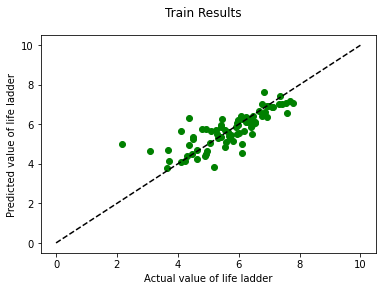

In [27]:
# Make a scatterplot for train results
plt.figure(figsize=(6,4))
plt.scatter(x=y_train,y=train_preds, color='g')
plt.plot([0,10],[0,10],'--k')
plt.axis('tight')
plt.xlabel('Actual value of life ladder')
plt.ylabel('Predicted value of life ladder')
plt.suptitle('Train Results')
plt.show()

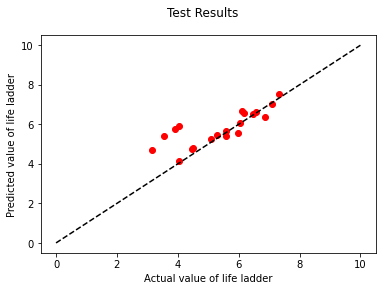

In [28]:
# Make a scatterplot for test results
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=test_preds, color='r')
plt.plot([0,10],[0,10],'--k')
plt.axis('tight')
plt.xlabel('Actual value of life ladder')
plt.ylabel('Predicted value of life ladder')
plt.suptitle('Test Results')
plt.show()

# Ql0) Cross validation and model evaluation
- Write your own ten-fold cross-validation on X_train with a for loop (just like we did in class.) 
- Apply the model each of the ten times to the X_test partition (once for each fold). 
- Store your results efficiently in the for loop! 
- Calculate mean absolute error for each fold and application of the model to X_test. 
- Make a scatterplot of actual vs. predicted values for each fold and for each application of the model to X_test with nice axis labels, titles and markers. 
- Were your results consistent among all of the folds and on X_test? Did your model quality decrease or remain fairly consistent?

In [29]:
df=pd.read_excel('/content/drive/MyDrive/OPIM 5512 DS using Python Colab/DataForTable2.1.xls')
df=df[df['year']==2021] 
df=df.dropna(axis=0)

In [30]:
#To remove the categorical variable, drop the country name column 
df.head()
del df['Country name']

In [31]:
df.shape #After dropping the country name, 100 rows and 11 columns remain.

(100, 11)

In [32]:
# Set a blank list to store the results of 10-fold MAE and prediction result 
resultDF10=[]
test_result=[]

for i in range(0,10,1):

# generalized 
  test_df=df[i*10:(i+1)*10]
  train_df=df.drop(index=test_df.index)

# split into the X_test,X_train,y_test,y_train
  y_test=test_df['Life Ladder']
  y_train=train_df['Life Ladder']
  X_test=test_df.drop('Life Ladder', axis=1)
  X_train=train_df.drop('Life Ladder', axis=1)

  y_test=pd.DataFrame(y_test)
  y_train=pd.DataFrame(y_train)
  X_test=pd.DataFrame(X_test)
  X_train=pd.DataFrame(X_train)

# train the datasets
  scaler=MinMaxScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)

# fit the model on the train set
  LR=LR.fit(X_train,y_train)
  train_preds=LR.predict(X_train)

# test the model and store the results of each trial (10 times)
  test_preds=LR.predict(X_test)
  test_result.append(test_preds)

# evaluate the model using MAE and save 10 MAE in the list
  myMAE=mean_absolute_error(y_test,test_preds)
  resultDF10.append(myMAE)

In [33]:
print(resultDF10) # We can find 10 MAE

[0.36573777963995713, 0.35915015306963544, 0.3069405047525513, 0.45890800953560007, 0.48237058213880274, 0.5437143894735084, 0.3278470904772176, 0.265323453394912, 0.3919230571258205, 0.4527511634045173]


In [36]:
resultDF10=pd.DataFrame(resultDF10)
resultDF10
np.mean(resultDF10)[0]  #The average of 10 MAE is 0.395

0.3954666183012522

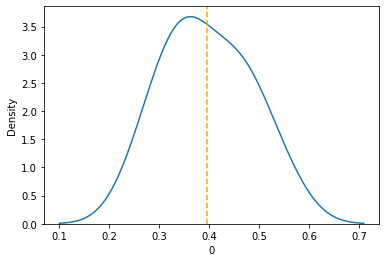

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(resultDF10[0])
plt.axvline(np.mean(resultDF10[0]),color='orange', linestyle='--')

In [38]:
# Transfer the datatype to dataframe to make a graph
test_result=np.array(test_result)
test_result=np.squeeze(test_result)
test_result=pd.DataFrame(test_result)
test_result 

,0,1,2,3,4,5,6,7,8,9
0,4.889948,6.202853,5.536815,7.116753,6.532695,3.464509,5.701008,5.634556,5.819071,6.164162
1,3.927231,4.276719,7.211945,6.284526,5.741925,3.929469,6.446755,6.244437,6.753475,7.637879
2,6.220934,5.635977,4.807718,5.892201,7.219044,7.663225,6.801463,5.292975,5.027284,6.672938
3,4.406571,5.316010,5.472486,6.123973,7.307462,4.734739,6.037136,4.791442,4.502953,7.224128
4,6.239991,5.984053,4.128194,5.479935,6.456227,4.823264,6.029338,4.575706,5.553880,6.464858
5,3.596320,6.122730,3.741744,3.767301,5.818211,5.875003,5.649037,5.437496,3.940346,5.061227
6,5.141615,4.227186,7.027977,7.346720,5.892261,4.901647,5.407522,7.507985,6.514845,6.375247
7,5.811858,5.630092,6.460058,6.139709,6.073162,5.624384,4.655144,5.826433,3.458473,6.317099
8,6.613830,5.886945,5.843390,6.401663,5.669442,7.517323,7.382597,4.524637,6.081725,3.876958
9,4.275977,4.284623,4.754773,5.579644,6.604154,6.895740,6.675539,5.979941,4.527910,4.426920


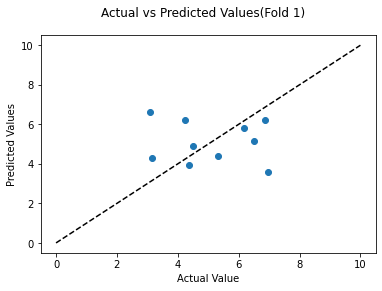

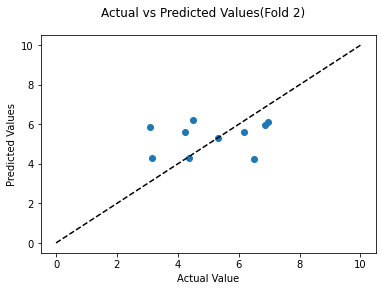

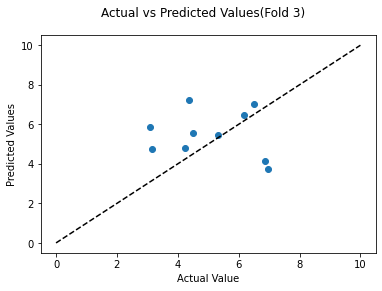

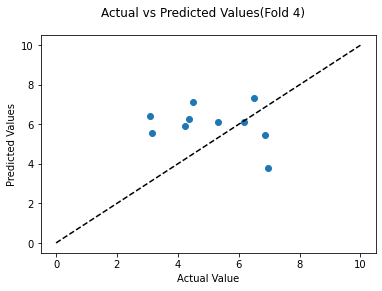

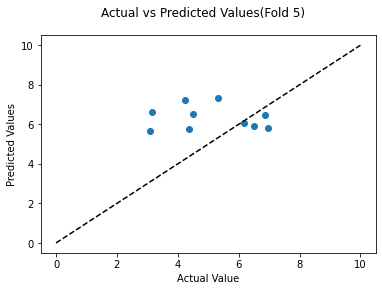

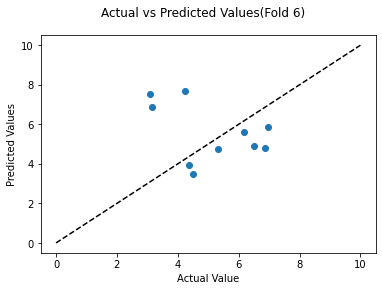

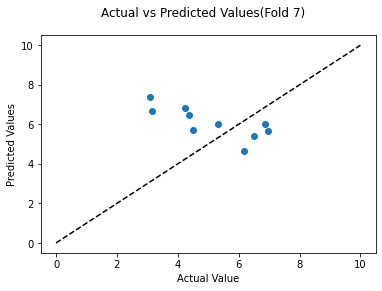

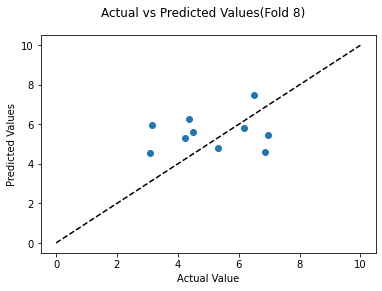

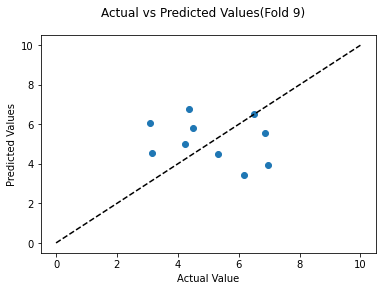

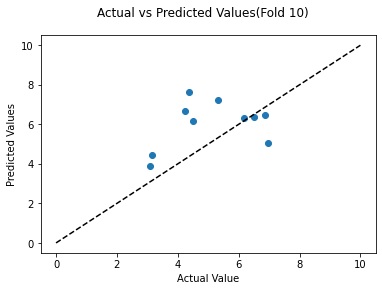

In [40]:
for i in range(10):
  plt.scatter(y_test,test_result[i])
  plt.plot([0,10],[0,10],'--k')
  plt.xlabel('Actual Value')
  plt.ylabel('Predicted Values')
  plt.suptitle('Actual vs Predicted Values(Fold {})'.format(i+1))
  plt.show()

- The average MAE score of 10 folds is 0.395, and the distribution of 10 folds is as follows.
[0.365, 0.359, 0.307, 0.459, 0.482, 0.544, 0.328, 0.265, 0.392, 0.453]. 
- Considering the 0.479 of train MAE and 0.529 of test MAE, MAE from cross-validation is smaller than the previous linear regression model. 
- When we look over the scatter plot, it seems fairly consistent.